In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.preprocessing import StandardScaler 

In [4]:
data = pd.read_csv("COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv")
warnings.filterwarnings("ignore")

### 1. Explore Time Series for weekly case rate 

<AxesSubplot:xlabel='Week Number'>

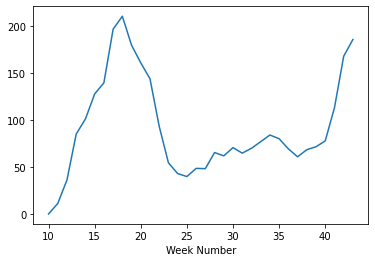

In [14]:
data_summary=data.groupby('Week Number')
data_summary= data_summary.aggregate(np.mean).fillna(0)
CaseRate = data_summary['Case Rate - Weekly']
CaseRate = CaseRate.squeeze()
CaseRate.plot()

1.1 choose the order of MA part of model

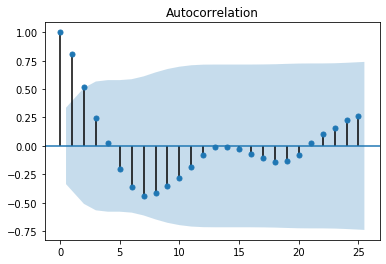

In [4]:
plot_acf(CaseRate, lags=25)
q=3
pyplot.show()

1.2 choose the order of AR part of model

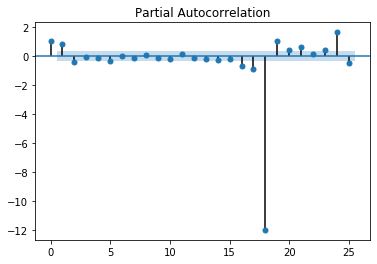

In [5]:
plot_pacf(CaseRate, lags=25)
p=3
pyplot.show()

1.3 Method: Moving Average (MA)

MSE: 539.605
Correlation: 0.955


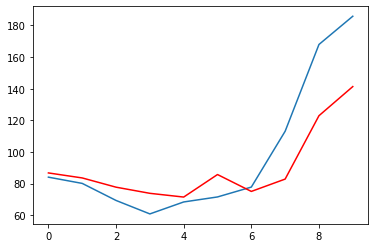

In [6]:
model = ARIMA(CaseRate, order = (0, 0, q))
fitted_model = model.fit()
n_test = 10 
data_list = CaseRate.values.tolist()
train, test = data_list[0:(len(data_list)-n_test)], data_list[(len(data_list)-n_test):len(data_list)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (0, 0, q))
    fitted_model = model.fit()
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

1.4 Method: Autoregression (AR)

MSE: 247.688
Correlation: 0.928


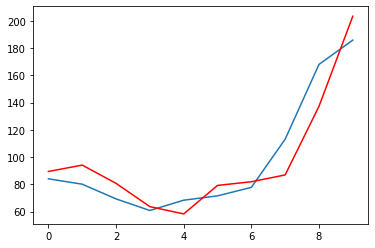

In [7]:
n_test = 10 
data_list = CaseRate.values.tolist()
train, test = data_list[0:(len(data_list)-n_test)], data_list[(len(data_list)-n_test):len(data_list)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (p, 0, 0))
    fitted_model = model.fit()
    model_case=fitted_model
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

1.5 Method: Autoregressive Moving Average (ARMA)

MSE: 437.350
Correlation: 0.914


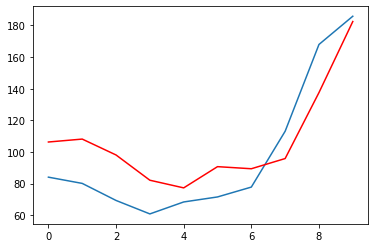

In [8]:
n_test = 10 
d=1
data_list = CaseRate.values.tolist()
train, test = data_list[0:(len(data_list)-n_test)], data_list[(len(data_list)-n_test):len(data_list)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (p, 0, q))
    fitted_model = model.fit()
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

1.6  Autoregressive Integrated Moving Average (ARIMA)

MSE: 318.623
Correlation: 0.925


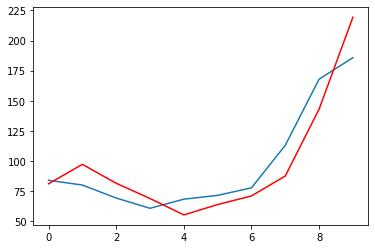

In [9]:
n_test = 10 
d=1
data_list = CaseRate.values.tolist()
train, test = data_list[0:(len(data_list)-n_test)], data_list[(len(data_list)-n_test):len(data_list)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (p, 1, q))
    fitted_model = model.fit()
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

result:

    MSE: 539.605 Correlation: 0.955  MA
    MSE: 247.688 Correlation: 0.928  AR
    MSE: 437.350 Correlation: 0.914  ARMA
    MSE: 318.623 Correlation: 0.925  ARIMA
Since they have similar correlation ratio, but AR modle has much lower MSE, we choose AR as our model to predict weekly case rate

### 2. Explore Time Series for weekly death rate 

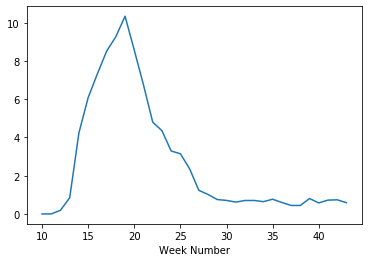

In [10]:
DeathRate = data_summary['Death Rate - Weekly']
DeathRate = DeathRate.squeeze()
DeathRate.plot()

2.1 choose the order of MA part of model

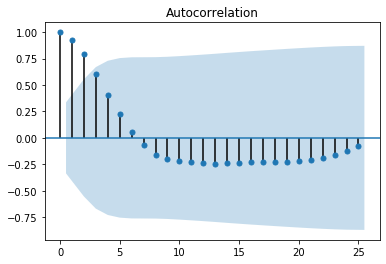

In [11]:
plot_acf(DeathRate, lags=25)
q=3
pyplot.show()

2.2 choose the order of AR part of model

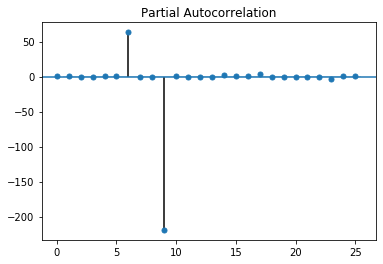

In [12]:
plot_pacf(DeathRate, lags=25)
p=1
pyplot.show()

2.3 Method: Moving Average (MA)

MSE: 1.880
Correlation: 0.199


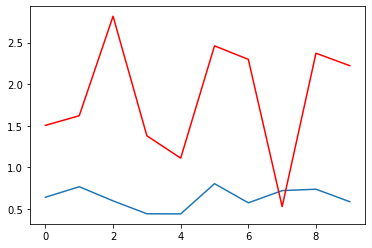

In [13]:
n_test = 10 
data_list = DeathRate.values.tolist()
train, test = data_list[0:(len(data_list)-n_test)], data_list[(len(data_list)-n_test):len(data_list)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (0, 0, q))
    fitted_model = model.fit()
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

2.4 Method: Autoregression (AR)

MSE: 0.038
Correlation: -0.038


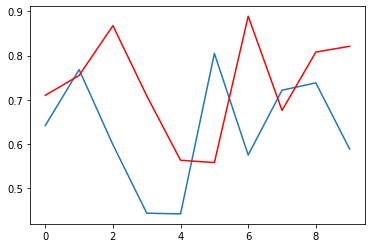

In [14]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (p, 0, 0))
    fitted_model = model.fit()
    model_death = fitted_model
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

2.5 Method: Autoregressive Moving Average (ARMA)

MSE: 0.124
Correlation: 0.099


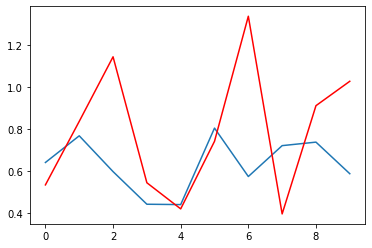

In [15]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (p, 0, q))
    fitted_model = model.fit()
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

2.6 Autoregressive Integrated Moving Average (ARIMA)

MSE: 0.102
Correlation: 0.102


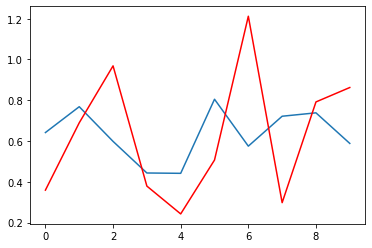

In [16]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (p, 1, q))
    fitted_model = model.fit()
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

result:

       MSE: 1.880 Correlation: 0.199 MA
       MSE: 0.038 Correlation: -0.038 AR
       MSE: 0.124 Correlation: 0.099 ARMA
       MSE: 0.102 Correlation: 0.102 ARIMA
Since they have similar low correlation ratio, but AR modle has much lower MSE, we choose AR as our model to predict weekly death rate

### 3. Explore Time Series for Cumulative case rate 

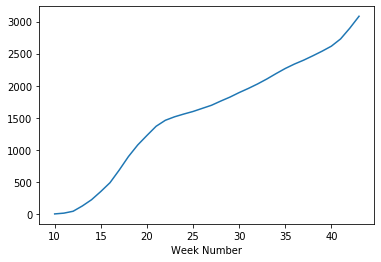

In [17]:
Case = data_summary['Case Rate - Cumulative']
Case = Case.squeeze()
Case.plot()

3.1 choose the order of MA part of model

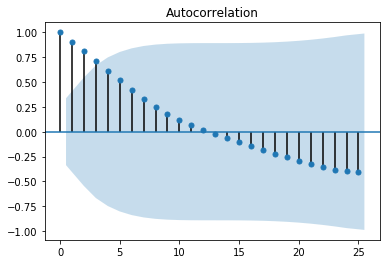

In [18]:
plot_acf(Case, lags=25)
q=4
pyplot.show()

3.2 choose the order of AR part of model

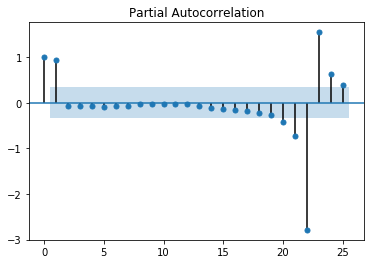

In [19]:
plot_pacf(Case, lags=25)
p=3
pyplot.show()

3.3 Method: Moving Average (MA)

MSE: 185896.774
Correlation: 0.985


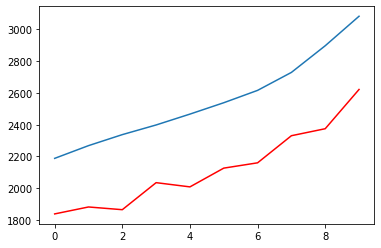

In [20]:
n_test = 10 
data_list = Case.values.tolist()
train, test = data_list[0:(len(data_list)-n_test)], data_list[(len(data_list)-n_test):len(data_list)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (0, 0, q))
    fitted_model = model.fit()
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

3.4 Method: Autoregression (AR)

MSE: 5397.438
Correlation: 0.992


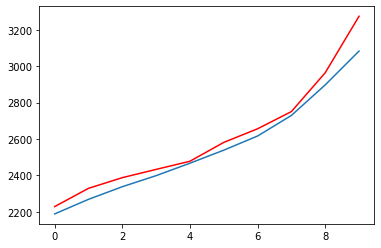

In [21]:
data_list = Case.values.tolist()
train, test = data_list[0:(len(data_list)-n_test)], data_list[(len(data_list)-n_test):len(data_list)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (p, 0, 0))
    fitted_model = model.fit()
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    model_cumulative_case = fitted_model
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

3.5 Autoregressive Integrated Moving Average (ARIMA)

MSE: 10199.136
Correlation: 0.989


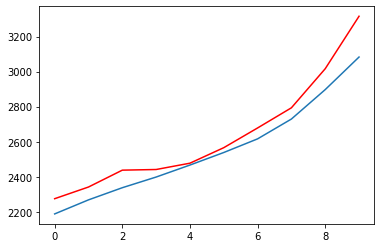

In [22]:
n_test = 10 
data_list = Case.values.tolist()
train, test = data_list[0:(len(data_list)-n_test)], data_list[(len(data_list)-n_test):len(data_list)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order = (p, 1, q))
    fitted_model = model.fit()
    predicted = fitted_model.predict(len(train)+1, len(train)+1)
    predictions.append(predicted[-1])
    train.append(test[t])
# Evaluate predictions
error = mean_squared_error(test, predictions)
corr = np.corrcoef(test, predictions)[1, 0]
print('MSE: %.3f' % error)
print('Correlation: %.3f' % corr)
# Plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

result:
 
    MSE: 185896.774 Correlation: 0.985 MA
    MSE: 5397.438 Correlation: 0.992 AR
    MSE: 10199.136 Correlation: 0.989 ARIMA
Since they have similar high correlation ratio, but AR modle has much lower MSE, we choose AR as our model to predict cumulative case rate

### 4. predict weekly case rate, weekly death rate, Cumulative case rate within 10 weeks

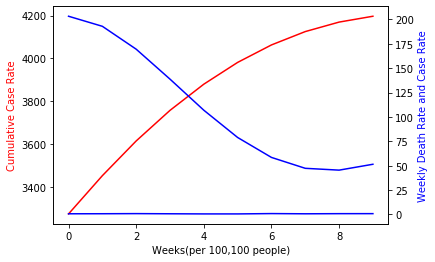

In [61]:
casepredictions = list()
deathpredictions = list()
cumupredictions = list()
for t in range(10):
    predicted = model_case.predict(t+34,t+34)
    casepredictions.append(predicted[-1])
for t in range(10):
    predicted = model_death.predict(t+34,t+34)
    deathpredictions.append(predicted[-1])    
for t in range(10):
    predicted = model_cumulative_case.predict(t+34,t+34)
    cumupredictions.append(predicted[-1])
    
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.set_ylabel('Cumulative Case Rate', color='red')
ax_left.set_xlabel('Weeks(per 100,100 people)', color='black')
ax_right.set_ylabel('Weekly Death Rate and Case Rate', color='blue')
ax_left.plot(cumupredictions, color='red')
ax_right.plot(deathpredictions, color='blue')
ax_right.plot(casepredictions, color='blue')


### 4. Clustering Chicago into three danger levels

In [24]:
recent=data.loc[data['Week Number']==data['Week Number'].max()]
recent.head()

ZIP Code  Week Number  Week Start    Week End  Cases - Weekly  \
0     60620           43  10/18/2020  10/24/2020            97.0   
2     60621           43  10/18/2020  10/24/2020            22.0   
8     60623           43  10/18/2020  10/24/2020           234.0   
9     60625           43  10/18/2020  10/24/2020           122.0   
36    60629           43  10/18/2020  10/24/2020           469.0   

    Cases - Cumulative  Case Rate - Weekly  Case Rate - Cumulative  \
0               1944.0               142.0                  2854.8   
2                855.0                76.0                  2944.0   
8               5099.0               272.0                  5930.5   
9               2616.0               154.0                  3301.2   
36              6605.0               419.0                  5905.2   

    Tests - Weekly  Tests - Cumulative  ...  Test Rate - Cumulative  \
0           1494.0               26336  ...                 38674.8   
2            491.0               11563  ...                 39814.8   
8           1917.0               34252  ...                 39837.6   
9           2618.0               36772  ...                 46404.1   
36          2950.0               44170  ...                 39490.4   

    Percent Tested Positive - Weekly  Percent Tested Positive - Cumulative  \
0                                0.1                                   0.1   
2                                0.0                                   0.1   
8                                0.1                                   0.2   
9                                0.1                                   0.1   
36                               0.2                                   0.2   

    Deaths - Weekly  Deaths - Cumulative  Death Rate - Weekly  \
0                 0                   81                  0.0   
2                 0                   52                  0.0   
8                 0                  164                  0.0   
9                 1                  116                  1.3   
36                1                  121                  0.9   

    Death Rate - Cumulative  Population    Row ID  \
0                     118.9       68096  60620-43   
2                     179.1       29042  60621-43   
8                     190.7       85979  60623-43   
9                     146.4       79243  60625-43   
36                    108.2      111850  60629-43   

               ZIP Code Location  
0   POINT (-87.651656 41.740873)  
2   POINT (-87.638812 41.776931)  
8   POINT (-87.717446 41.850321)  
9   POINT (-87.701816 41.971155)  
36  POINT (-87.711565 41.777061)  

[5 rows x 21 columns]

In [25]:
Y = pd.DataFrame(recent['Percent Tested Positive - Weekly'])
Y['Case Rate - Cumulative'] = recent['Case Rate - Cumulative']
Y['Death Rate - Weekly'] = recent['Death Rate - Weekly']
Y['Death Rate - Cumulative']=recent['Death Rate - Cumulative']
Y=Y.fillna(0)

In [26]:
scaler = StandardScaler()
scaler.fit(Y)
Y_scaled = scaler.transform(Y)

In [27]:
clustering = KMeans(n_clusters=3,init='random',max_iter=10,random_state=0).fit(Y_scaled)
clusters = clustering.labels_
silhouette_coefficient = metrics.silhouette_score(Y_scaled, clusters, metric = "euclidean")
print( silhouette_coefficient)
recent["cluster"]= clusters
recent.head()

0.30660778526612825


ZIP Code  Week Number  Week Start    Week End  Cases - Weekly  \
0     60620           43  10/18/2020  10/24/2020            97.0   
2     60621           43  10/18/2020  10/24/2020            22.0   
8     60623           43  10/18/2020  10/24/2020           234.0   
9     60625           43  10/18/2020  10/24/2020           122.0   
36    60629           43  10/18/2020  10/24/2020           469.0   

    Cases - Cumulative  Case Rate - Weekly  Case Rate - Cumulative  \
0               1944.0               142.0                  2854.8   
2                855.0                76.0                  2944.0   
8               5099.0               272.0                  5930.5   
9               2616.0               154.0                  3301.2   
36              6605.0               419.0                  5905.2   

    Tests - Weekly  Tests - Cumulative  ...  Percent Tested Positive - Weekly  \
0           1494.0               26336  ...                               0.1   
2            491.0               11563  ...                               0.0   
8           1917.0               34252  ...                               0.1   
9           2618.0               36772  ...                               0.1   
36          2950.0               44170  ...                               0.2   

    Percent Tested Positive - Cumulative  Deaths - Weekly  \
0                                    0.1                0   
2                                    0.1                0   
8                                    0.2                0   
9                                    0.1                1   
36                                   0.2                1   

    Deaths - Cumulative  Death Rate - Weekly  Death Rate - Cumulative  \
0                    81                  0.0                    118.9   
2                    52                  0.0                    179.1   
8                   164                  0.0                    190.7   
9                   116                  1.3                    146.4   
36                  121                  0.9                    108.2   

    Population    Row ID             ZIP Code Location cluster  
0        68096  60620-43  POINT (-87.651656 41.740873)       1  
2        29042  60621-43  POINT (-87.638812 41.776931)       1  
8        85979  60623-43  POINT (-87.717446 41.850321)       1  
9        79243  60625-43  POINT (-87.701816 41.971155)       1  
36      111850  60629-43  POINT (-87.711565 41.777061)       0  

[5 rows x 22 columns]